In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
training_data = pd.read_csv('../Datasets/full_scaled_data.csv')
X_scaled = training_data.drop(columns=['label'])
y_scaled = training_data['label']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=42)

In [4]:
classify_type = "binary"

In [5]:
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)
y_knn_train_predict = knn.predict(X_train)
y_knn_test_predict = knn.predict(X_test)

In [6]:
print("Accuracy:    ", accuracy_score(y_test, y_knn_test_predict))
print("Precision:   ", precision_score(y_test, y_knn_test_predict))
print("Recall:      ", recall_score(y_test, y_knn_test_predict))
print("F1-score:    ", f1_score(y_test, y_knn_test_predict))

Accuracy:     0.9461205849487441
Precision:    0.9742091103070786
Recall:       0.9266678432756795
F1-score:     0.9498439690651712


In [7]:
print(classification_report(y_test, y_knn_test_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9251
           1       0.97      0.93      0.95     11332

    accuracy                           0.95     20583
   macro avg       0.94      0.95      0.95     20583
weighted avg       0.95      0.95      0.95     20583



In [8]:
display_labels = {"binary":["Normal","Attacked"],"multiclass":["Normal","Generic","Exploits","Fuzzers","DoS","Reconnaissance","Analysis", "Backdoor", "Shellcode", "Worms"]}


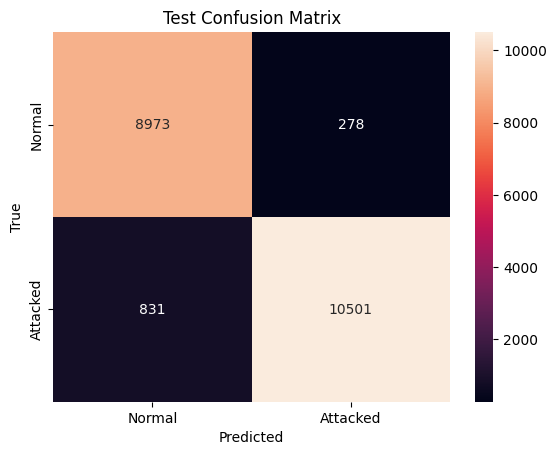

In [9]:
matrix_test = sns.heatmap(confusion_matrix(y_test, y_knn_test_predict),annot=True, fmt='d',xticklabels=display_labels[classify_type], yticklabels=display_labels[classify_type])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Confusion Matrix")
plt.savefig('../images/knn_test_confusion_matrix_' + classify_type + ".png", bbox_inches='tight')
plt.show()

In [19]:
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=9)
gb.fit(X_train, y_train)
y_gb_train_predict = gb.predict(X_train)
y_gb_test_predict = gb.predict(X_test)

In [20]:
print("Accuracy:    ", accuracy_score(y_test, y_gb_test_predict))
print("Precision:   ", precision_score(y_test, y_gb_test_predict))
print("Recall:      ", recall_score(y_test, y_gb_test_predict))
print("F1-score:    ", f1_score(y_test, y_gb_test_predict))

Accuracy:     0.9803235679930039
Precision:    0.9872469455096763
Recall:       0.976879632897988
F1-score:     0.9820359281437125


In [21]:
print(classification_report(y_test, y_gb_test_predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      9251
           1       0.99      0.98      0.98     11332

    accuracy                           0.98     20583
   macro avg       0.98      0.98      0.98     20583
weighted avg       0.98      0.98      0.98     20583



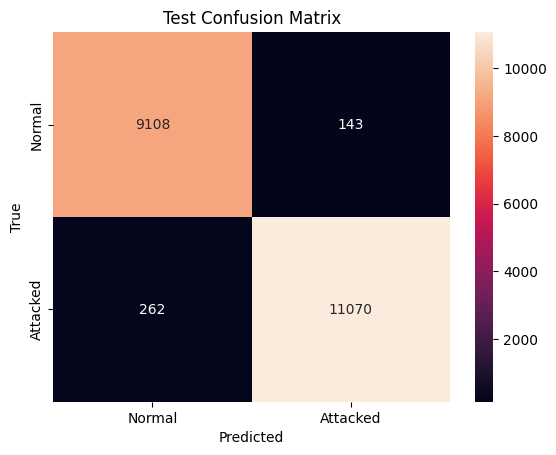

In [22]:
matrix_test = sns.heatmap(confusion_matrix(y_test, y_gb_test_predict),annot=True, fmt='d',xticklabels=display_labels[classify_type], yticklabels=display_labels[classify_type])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Confusion Matrix")
plt.savefig('../images/gb_test_confusion_matrix_' + classify_type + ".png", bbox_inches='tight')
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression(penalty='l1', C=8.0, solver='liblinear', max_iter=100)
#lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_lr_train_predict = lr.predict(X_train)
y_lr_test_predict = lr.predict(X_test)

In [16]:
print("Accuracy:    ", accuracy_score(y_test, y_lr_test_predict))
print("Precision:   ", precision_score(y_test, y_lr_test_predict))
print("Recall:      ", recall_score(y_test, y_lr_test_predict))
print("F1-score:    ", f1_score(y_test, y_lr_test_predict))

Accuracy:     0.9135694505174173
Precision:    0.9281936351411922
Recall:       0.9136957289092834
F1-score:     0.9208876239605105


In [17]:
print(classification_report(y_test, y_lr_test_predict))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      9251
           1       0.93      0.91      0.92     11332

    accuracy                           0.91     20583
   macro avg       0.91      0.91      0.91     20583
weighted avg       0.91      0.91      0.91     20583



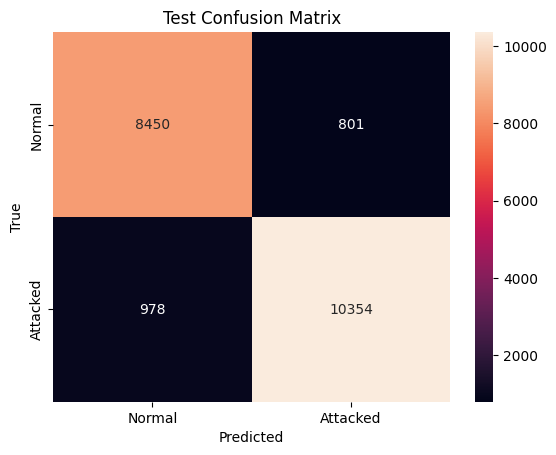

In [18]:
matrix_test = sns.heatmap(confusion_matrix(y_test, y_lr_test_predict),annot=True, fmt='d',xticklabels=display_labels[classify_type], yticklabels=display_labels[classify_type])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Confusion Matrix")
plt.savefig('../images/lr_test_confusion_matrix_' + classify_type + ".png", bbox_inches='tight')
plt.show()